In [1]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="Z5EX5iVLKODVqQUtvWQs")
project = rf.workspace("ip2").project("ip102_2")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to IP102_2-1 in yolov8:: 100%|██████████| 19062/19062 [00:05<00:00, 3447.01it/s]


In [3]:
import os
import imgaug.augmenters as iaa
from PIL import Image
import numpy as np

In [4]:
print(f"Dataset downloaded and saved to {dataset.location}")

Dataset downloaded and saved to /content/IP102_2-1


In [6]:
#import yaml
#with open('/kaggle/working/IP102_2-1/data.yaml','r') as f:
#    data = yaml.safe_load(f)
#data

In [7]:
'''data = {'names': ['Adristyrannus',
  'Aleurocanthus spiniferus',
  'Ampelophaga',
  'Aphis citricola Vander Goot',
  'Apolygus lucorum',
  'Bactrocera tsuneonis',
  'Ceroplastes rubens',
  'Chlumetia transversa',
  'Chrysomphalus aonidum',
  'Cicadella viridis',
  'Cicadellidae',
  'Dacus dorsalis-Hendel-',
  'Dasineura sp',
  'Deporaus marginatus Pascoe',
  'Erythroneura apicalis',
  'Lawana imitata Melichar',
  'Limacodidae',
  'Lycorma delicatula',
  'Mango flat beak leafhopper',
  'Miridae',
  'Panonchus citri McGregor',
  'Papilio xuthus',
  'Parlatoria zizyphus Lucus',
  'Phyllocnistis citrella Stainton',
  'Phyllocoptes oleiverus ashmead',
  'Pieris canidia',
  'Polyphagotars onemus latus',
  'Prodenia litura',
  'Rhytidodera bowrinii white',
  'Salurnis marginella Guerr',
  'Scirtothrips dorsalis Hood',
  'Sternochetus frigidus',
  'Tetradacus c Bactrocera minax',
  'Thrips',
  'Toxoptera aurantii',
  'Toxoptera citricidus',
  'Trialeurodes vaporariorum',
  'Unaspis yanonensis',
  'Viteus vitifoliae',
  'Xylotrechus',
  'alfalfa seed chalcid',
  'blister beetle',
  'legume blister beetle',
  'odontothrips loti',
  'oides decempunctata',
  'parathrene regalis',
  'therioaphis maculata Buckton',
  'undefined'],
 'nc': 48,
 'roboflow': {'license': 'CC BY 4.0',
  'project': 'ip102_2',
  'url': 'https://universe.roboflow.com/ip2/ip102_2/dataset/1',
  'version': 1,
  'workspace': 'ip2'},
 'test': '../test/images',
 'train': '../train/images',
 'val': '../valid/images'}'''

"data = {'names': ['Adristyrannus',\n  'Aleurocanthus spiniferus',\n  'Ampelophaga',\n  'Aphis citricola Vander Goot',\n  'Apolygus lucorum',\n  'Bactrocera tsuneonis',\n  'Ceroplastes rubens',\n  'Chlumetia transversa',\n  'Chrysomphalus aonidum',\n  'Cicadella viridis',\n  'Cicadellidae',\n  'Dacus dorsalis-Hendel-',\n  'Dasineura sp',\n  'Deporaus marginatus Pascoe',\n  'Erythroneura apicalis',\n  'Lawana imitata Melichar',\n  'Limacodidae',\n  'Lycorma delicatula',\n  'Mango flat beak leafhopper',\n  'Miridae',\n  'Panonchus citri McGregor',\n  'Papilio xuthus',\n  'Parlatoria zizyphus Lucus',\n  'Phyllocnistis citrella Stainton',\n  'Phyllocoptes oleiverus ashmead',\n  'Pieris canidia',\n  'Polyphagotars onemus latus',\n  'Prodenia litura',\n  'Rhytidodera bowrinii white',\n  'Salurnis marginella Guerr',\n  'Scirtothrips dorsalis Hood',\n  'Sternochetus frigidus',\n  'Tetradacus c Bactrocera minax',\n  'Thrips',\n  'Toxoptera aurantii',\n  'Toxoptera citricidus',\n  'Trialeurodes 

In [8]:
#with open('/kaggle/working/IP102_2-1/data.yaml','w') as f:
#    yaml.dump(data, f)
#data

In [10]:
img_path = os.listdir('/content/IP102_2-1/train/images')[1]
label_path = os.listdir('/content/IP102_2-1/train/labels')[1]

#### Preprocessing

- data augmentation

In [11]:
# Define augmentation sequence
augmenter = iaa.Sequential([
    iaa.Fliplr(0.5),  # horizontal flips
    iaa.Flipud(0.5),  # vertical flips
    iaa.Rotate((-45, 45)),  # random rotations
    #iaa.GaussianBlur(sigma=(0, 3.0)),  # blur images
    iaa.AdditiveGaussianNoise(scale=(0, 0.1 * 255)),  # add Gaussian noise
    #iaa.Multiply((0.5, 1.5), per_channel=0.5),  # brightness change
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},  # scale images
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},  # translate images
        rotate=(-25, 25),  # rotate images
        shear=(-8, 8)  # shear images
    )
])

In [12]:
# Paths to your dataset folders
train_images_path = "/content/IP102_2-1/train/images/"
train_labels_path = "/content/IP102_2-1/train/labels/"
valid_images_path = "/content/IP102_2-1/valid/images/"
valid_labels_path = "/content/IP102_2-1/valid/labels/"

In [13]:
# Augment and save images
def augment_and_save(images_path, labels_path, output_images_path, output_labels_path,
                     num_augmentations_per_image=5):
    data_size = {}
    image_files = os.listdir(images_path)
    for image_file in image_files:
        # Load image
        image = Image.open(os.path.join(images_path, image_file))
        image = np.array(image)

        # Load corresponding label file
        with open(os.path.join(labels_path, os.path.splitext(image_file)[0] + '.txt'), 'r') as label_file:
            lines = label_file.readlines()
            bounding_boxes = []
            for line in lines:
                class_label = int(line.strip().split()[0])
                bounding = [class_label] + list(map(float, line.strip().split()[1:]))
                bounding_boxes.append(bounding)

        # Apply augmentation multiple times
        for i in range(num_augmentations_per_image):
            augmented_image = augmenter(image=image)

            # Save augmented image
            augmented_image_filename = os.path.splitext(image_file)[0][:10] + f"_aug{i}.jpg"
            Image.fromarray(augmented_image).save(os.path.join(output_images_path, augmented_image_filename))

            # Save augmented label file
            augmented_label_filename = os.path.splitext(image_file)[0][:10] + f"_aug{i}.txt"
            with open(os.path.join(output_labels_path, augmented_label_filename), 'w') as augmented_label_file:
                for bbox in bounding_boxes:
                    augmented_label_file.write(' '.join(map(str, bbox)) + '\n')

In [14]:
# Augment training images
#augment_and_save(train_images_path, train_labels_path, train_images_path, train_labels_path,
#                 num_augmentations_per_image=5)

In [15]:
# Augment validation images
#augment_and_save(valid_images_path, valid_labels_path, valid_images_path, valid_labels_path,
#                     num_augmentations_per_image=5)

In [16]:
base_train = '/content/IP102_2-1/train/labels'
base_val = '/content/IP102_2-1/valid/labels'

from collections import defaultdict

def get_size_labels(base):
    data_size_aug = defaultdict(int)  # Initialize as defaultdict with int
    for file in os.listdir(base):
        path = os.path.join(base, file)
        with open(path, 'r') as f:
            for line in f.readlines():
                class_value = line.split(' ')[0]
                data_size_aug[class_value] += 1
    return data_size_aug
data_size_aug_train = get_size_labels(base_train)
data_size_aug_val = get_size_labels(base_val)

In [17]:
data_size_aug_val

defaultdict(int,
            {'47': 285,
             '46': 123,
             '29': 8,
             '5': 18,
             '13': 18,
             '16': 8,
             '42': 19,
             '0': 49,
             '41': 48,
             '36': 117,
             '37': 17,
             '39': 38,
             '31': 15,
             '28': 1,
             '10': 7,
             '23': 16,
             '40': 4,
             '33': 6,
             '14': 12,
             '26': 17,
             '1': 7,
             '9': 13,
             '19': 23,
             '22': 38,
             '17': 21,
             '32': 15,
             '27': 2,
             '12': 8,
             '45': 7,
             '8': 69,
             '18': 7,
             '25': 2,
             '4': 5,
             '24': 6,
             '3': 2,
             '20': 12,
             '38': 11,
             '6': 48,
             '21': 1,
             '34': 2,
             '2': 2,
             '11': 6,
             '7': 5,
             '15': 2,

# **YOLOV8**

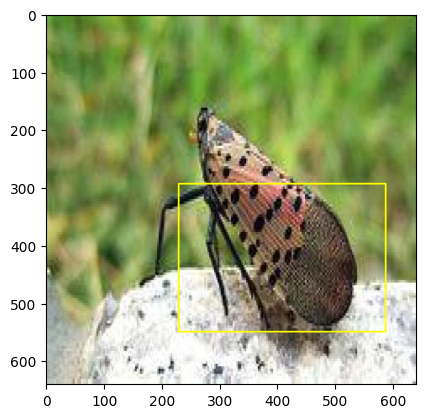

In [18]:
import cv2
import matplotlib.pyplot as plt

# Load image
image_path = os.path.join('/content/IP102_2-1/train/images',
                          os.listdir('/content/IP102_2-1/train/images')[20])
label_path = os.path.join('/content/IP102_2-1/train/labels',
                          os.listdir('/content/IP102_2-1/train/labels')[20])

img = cv2.imread(image_path)
dh, dw, _ = img.shape

# Read labels and draw rectangles
with open(label_path, 'r') as f1:
    data = f1.readlines()

    for dt in data:
        _, x, y, w, h = map(float, dt.split(' '))

        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)

        l = max(0, l)
        r = min(dw - 1, r)
        t = max(0, t)
        b = min(dh - 1, b)

        cv2.rectangle(img, (l, t), (r, b), (0, 255, 255), 2)

# Display the image with bounding boxes
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
import shutil
import os

train_images_path = '/content/IP102_2-1/train/images'
train_labels_path = '/content/IP102_2-1/train/labels'

val_images_path   = '/content/IP102_2-1/valid/images'
val_labels_path   = '/content/IP102_2-1/valid/labels'

test_images_path  = '/content/IP102_2-1/test/images'
test_labels_path  = '/content/IP102_2-1/test/labels'

In [20]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.0/793.0 kB 13.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [21]:
from ultralytics import YOLO
from IPython.display import display, Image

In [22]:
model = YOLO('yolov8n.pt', verbose=True)

100%|██████████| 6.23M/6.23M [00:00<00:00, 269MB/s]


In [23]:
model.train(
    data = '/content/IP102_2-1/data.yaml' ,
    epochs = 50,
    imgsz=640
)

Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/IP102_2-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

100%|██████████| 755k/755k [00:00<00:00, 112MB/s]


Overriding model.yaml nc=80 with nc=48

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/IP102_2-1/train/labels... 7620 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7620/7620 [00:09<00:00, 780.28it/s]

train: WARNING ⚠️ /content/IP102_2-1/train/images/IP087000986_jpg.rf.77b7d3b8c4a31f340972b461fa7c76aa.jpg: 1 duplicate labels removed


train: New cache created: /content/IP102_2-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/IP102_2-1/valid/labels... 953 images, 0 backgrounds, 0 corrupt: 100%|██████████| 953/953 [00:01<00:00, 526.02it/s]

val: New cache created: /content/IP102_2-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000192, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.64G      1.422      4.015      1.832          8        640: 100%|██████████| 477/477 [03:19<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:15<00:00,  1.88it/s]

                   all        953       1141      0.773     0.0815     0.0801     0.0398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.31G      1.307      2.932        1.7         10        640: 100%|██████████| 477/477 [03:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:15<00:00,  1.99it/s]

                   all        953       1141      0.765      0.183      0.183      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.31G      1.298      2.559       1.68         10        640: 100%|██████████| 477/477 [03:13<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:13<00:00,  2.22it/s]

                   all        953       1141      0.615      0.274      0.255      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.31G      1.297      2.316      1.661          9        640: 100%|██████████| 477/477 [03:08<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.78it/s]

                   all        953       1141      0.622      0.271      0.284       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.32G      1.268      2.124      1.636          8        640: 100%|██████████| 477/477 [03:09<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:13<00:00,  2.26it/s]


                   all        953       1141      0.624       0.34      0.361       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.31G      1.258      1.996      1.631          8        640: 100%|██████████| 477/477 [03:07<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:12<00:00,  2.45it/s]

                   all        953       1141      0.618      0.355      0.358      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.33G      1.253      1.853      1.616         10        640: 100%|██████████| 477/477 [03:10<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:13<00:00,  2.17it/s]

                   all        953       1141      0.618      0.408      0.434      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.31G      1.245      1.795      1.616          4        640: 100%|██████████| 477/477 [03:11<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        953       1141      0.633      0.406      0.449      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.3G      1.239      1.722      1.603          8        640: 100%|██████████| 477/477 [03:10<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.74it/s]

                   all        953       1141      0.691      0.379      0.436      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.35G      1.226      1.646      1.593          9        640: 100%|██████████| 477/477 [03:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.69it/s]


                   all        953       1141      0.677       0.39      0.464      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.32G      1.227      1.625      1.592         10        640: 100%|██████████| 477/477 [03:03<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:12<00:00,  2.35it/s]

                   all        953       1141      0.561      0.447       0.45      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.29G      1.218      1.573      1.585          7        640: 100%|██████████| 477/477 [03:03<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.02it/s]

                   all        953       1141      0.663      0.405      0.482      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.27G      1.209      1.522      1.571         11        640: 100%|██████████| 477/477 [03:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


                   all        953       1141      0.516      0.514      0.506      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.31G       1.21      1.492      1.568         10        640: 100%|██████████| 477/477 [03:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:13<00:00,  2.17it/s]

                   all        953       1141      0.621      0.497      0.521      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.31G      1.202      1.463      1.567         27        640: 100%|██████████| 477/477 [03:02<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:12<00:00,  2.49it/s]

                   all        953       1141       0.53      0.527      0.496      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.32G      1.196      1.451       1.56         11        640: 100%|██████████| 477/477 [03:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]


                   all        953       1141      0.535      0.527      0.502      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.32G      1.192      1.427      1.556         12        640: 100%|██████████| 477/477 [03:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:13<00:00,  2.19it/s]


                   all        953       1141      0.528      0.524      0.527      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.31G      1.193      1.387      1.558         12        640: 100%|██████████| 477/477 [03:06<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.90it/s]

                   all        953       1141      0.647      0.503      0.569       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.31G      1.185      1.348      1.553          5        640: 100%|██████████| 477/477 [03:09<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:12<00:00,  2.39it/s]

                   all        953       1141      0.559       0.53      0.539      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.31G      1.179      1.325      1.544          8        640: 100%|██████████| 477/477 [03:15<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:14<00:00,  2.08it/s]

                   all        953       1141      0.571      0.518      0.553      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.26G      1.176       1.31      1.542         12        640: 100%|██████████| 477/477 [03:06<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.87it/s]


                   all        953       1141      0.686      0.474      0.543      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.31G      1.167      1.308      1.538         11        640: 100%|██████████| 477/477 [03:09<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:13<00:00,  2.25it/s]

                   all        953       1141      0.562      0.553      0.591      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.28G      1.166      1.294      1.535         11        640: 100%|██████████| 477/477 [03:07<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]

                   all        953       1141      0.579      0.565      0.582      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.28G      1.166      1.276      1.531          7        640: 100%|██████████| 477/477 [03:08<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:13<00:00,  2.24it/s]

                   all        953       1141      0.606      0.593       0.62      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.32G      1.156       1.26      1.533          7        640: 100%|██████████| 477/477 [03:04<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:13<00:00,  2.23it/s]

                   all        953       1141      0.597      0.519      0.585      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.31G       1.15      1.233      1.516         11        640: 100%|██████████| 477/477 [03:07<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.76it/s]

                   all        953       1141      0.573      0.587      0.597       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.31G      1.142      1.228      1.517         10        640: 100%|██████████| 477/477 [03:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.77it/s]


                   all        953       1141      0.584      0.606      0.599      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.31G      1.137      1.211       1.52          7        640: 100%|██████████| 477/477 [03:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:13<00:00,  2.19it/s]

                   all        953       1141      0.614      0.592      0.618      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.3G      1.146      1.198      1.513          9        640: 100%|██████████| 477/477 [03:04<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]


                   all        953       1141      0.641      0.596      0.635      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.31G      1.143      1.182      1.516         12        640: 100%|██████████| 477/477 [03:06<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:15<00:00,  1.97it/s]


                   all        953       1141      0.639      0.546      0.612      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.31G      1.131      1.183      1.505          6        640: 100%|██████████| 477/477 [03:07<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


                   all        953       1141      0.585      0.641       0.63       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.36G      1.122      1.161      1.501         16        640: 100%|██████████| 477/477 [03:03<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:13<00:00,  2.26it/s]

                   all        953       1141      0.579      0.617      0.646      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       2.3G      1.125      1.159        1.5          7        640: 100%|██████████| 477/477 [03:06<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:12<00:00,  2.47it/s]


                   all        953       1141      0.555      0.685      0.624      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.31G       1.11      1.132      1.492         10        640: 100%|██████████| 477/477 [03:04<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:12<00:00,  2.48it/s]

                   all        953       1141      0.539      0.648      0.636      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.31G      1.102      1.116      1.483         17        640: 100%|██████████| 477/477 [03:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.52it/s]

                   all        953       1141      0.564      0.653      0.626      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.31G      1.111      1.126      1.491         12        640: 100%|██████████| 477/477 [03:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:12<00:00,  2.47it/s]


                   all        953       1141      0.661      0.583      0.663      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       2.3G      1.099      1.105      1.483         19        640: 100%|██████████| 477/477 [03:07<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.51it/s]

                   all        953       1141       0.58      0.651      0.663      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.31G      1.108      1.105      1.486          5        640: 100%|██████████| 477/477 [03:10<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:14<00:00,  2.13it/s]

                   all        953       1141      0.564      0.694      0.661      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.31G      1.098      1.091      1.483          8        640: 100%|██████████| 477/477 [03:08<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:12<00:00,  2.48it/s]

                   all        953       1141      0.518      0.739      0.665      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.33G      1.093      1.075      1.475         11        640: 100%|██████████| 477/477 [03:16<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:13<00:00,  2.25it/s]


                   all        953       1141      0.552      0.679      0.655      0.435
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.57G      1.042     0.8012      1.628          4        640: 100%|██████████| 477/477 [02:57<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:13<00:00,  2.16it/s]

                   all        953       1141      0.575      0.669      0.662      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.31G      1.015     0.7707      1.604          5        640: 100%|██████████| 477/477 [02:57<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:12<00:00,  2.39it/s]

                   all        953       1141      0.578      0.685      0.669      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.31G      1.008     0.7532      1.597          5        640: 100%|██████████| 477/477 [02:56<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:13<00:00,  2.20it/s]

                   all        953       1141      0.613      0.635      0.691      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.31G     0.9979     0.7374       1.59          4        640: 100%|██████████| 477/477 [02:57<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:16<00:00,  1.85it/s]

                   all        953       1141      0.567      0.694      0.664      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       2.3G     0.9921     0.7259      1.581          6        640: 100%|██████████| 477/477 [02:55<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:13<00:00,  2.24it/s]

                   all        953       1141      0.592       0.67      0.674      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.31G     0.9865     0.7189      1.577          4        640: 100%|██████████| 477/477 [02:52<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:12<00:00,  2.48it/s]


                   all        953       1141      0.627      0.653      0.671      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.31G     0.9811     0.7042      1.571          4        640: 100%|██████████| 477/477 [02:53<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


                   all        953       1141       0.57      0.706       0.67      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.31G     0.9748     0.6968      1.567          4        640: 100%|██████████| 477/477 [02:59<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.07it/s]

                   all        953       1141      0.596      0.658      0.657      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       2.3G     0.9645     0.6878      1.552          4        640: 100%|██████████| 477/477 [02:59<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.73it/s]


                   all        953       1141      0.619       0.67      0.667      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.31G     0.9617     0.6926      1.556          4        640: 100%|██████████| 477/477 [02:57<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.82it/s]

                   all        953       1141      0.607      0.658      0.664      0.441



50 epochs completed in 2.770 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3015008 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:14<00:00,  2.10it/s]


                   all        953       1141       0.57      0.688      0.691      0.465
         Adristyrannus         46         49       0.76      0.857      0.843       0.54
Aleurocanthus spiniferus          5          7      0.175      0.286      0.391      0.271
           Ampelophaga          2          2      0.535          1      0.995      0.796
Aphis citricola Vander Goot          2          2      0.521          1      0.995      0.587
      Apolygus lucorum          5          5      0.419        0.8      0.784      0.551
  Bactrocera tsuneonis         16         18      0.653      0.833      0.857       0.61
    Ceroplastes rubens          2         48      0.792      0.917      0.935      0.377
  Chlumetia transversa          5          5      0.376        0.8      0.703      0.532
 Chrysomphalus aonidum          9         69      0.605      0.855      0.831      0.388
     Cicadella viridis         13         13      0.867      0.923      0.951      0.746
          Cica

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 47])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bdc00320250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,

In [24]:
os.listdir('runs/detect/train/weights')

['last.pt', 'best.pt']

In [25]:
names = ['best.pt', 'last.pt']

for fileName in names:
    outer_path = os.path.join('/content/runs/detect/train/weights', fileName)
    destination_path = os.path.join('/content', fileName)
    shutil.copy(outer_path, destination_path)

In [26]:
model = YOLO('/content/best.pt')


image 1/1 /content/IP102_2-1/test/images/IP080000037_jpg.rf.2382cd31fe8aa5af7e4f49028e5337f3.jpg: 640x640 3 Parlatoria zizyphus Lucuss, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


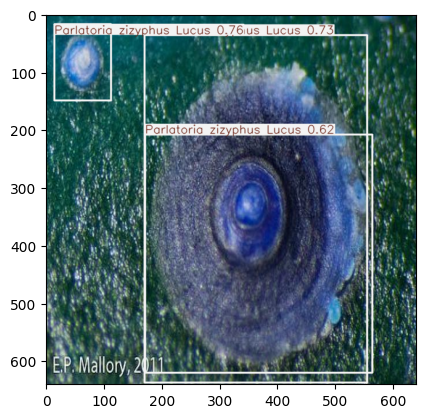


image 1/1 /content/IP102_2-1/test/images/IP102002237_jpg.rf.b8876d7ba7c70ede5f9b9cda51be7eda.jpg: 640x640 1 undefined, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


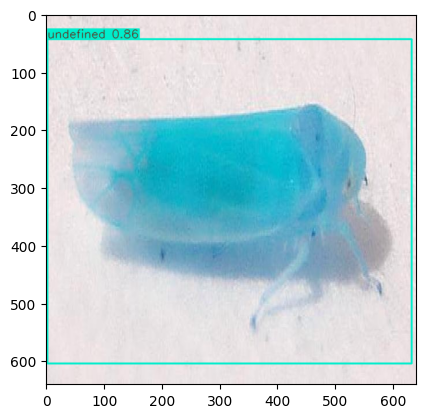


image 1/1 /content/IP102_2-1/test/images/IP050000164_jpg.rf.6f5b9cf7514759a978e4a65f48505616.jpg: 640x640 1 legume blister beetle, 1 therioaphis maculata Buckton, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


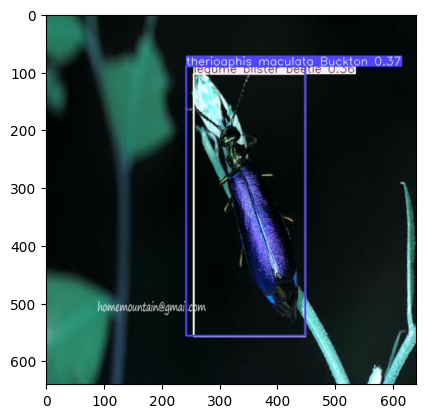


image 1/1 /content/IP102_2-1/test/images/IP102000789_jpg.rf.63758d6dbbd76b50d25679777e90a170.jpg: 640x640 1 undefined, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


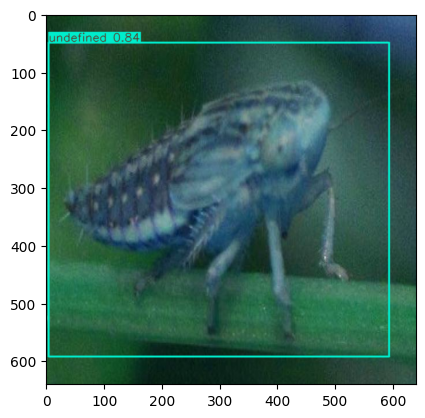


image 1/1 /content/IP102_2-1/test/images/IP073000027_jpg.rf.f1d92705a71807dc7e669866d442369a.jpg: 640x640 1 Miridae, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


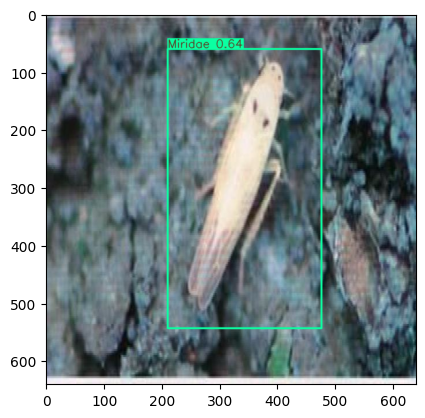


image 1/1 /content/IP102_2-1/test/images/IP096000357_jpg.rf.673f2365c2745a5f49f0a753cd3472c4.jpg: 640x640 1 Deporaus marginatus Pascoe, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


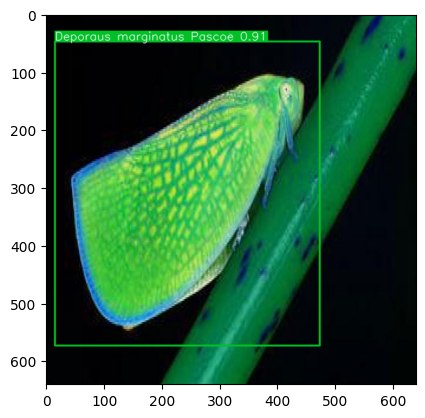

In [27]:
import cv2
files_name = os.listdir('/content/IP102_2-1/test/images')[9:15]
for i in files_name:
    img_path = os.path.join('/content/IP102_2-1/test/images', i)
    img = cv2.imread(img_path)
    prediction = model(img_path)
    plt.imshow(prediction[0].plot())
    plt.show()

In [ ]:
#prediction = model(img_path)
#model.export(format="onnx")

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------